### Making Predictions Using torch.inference_mode()

To check the models predictive power, we can see how well it predicts "y_test" based on "x_test"

When data is parsed through our model its going to be run through the forward method.

In [2]:
import torch
from torch import nn

import matplotlib.pyplot as plt

In [3]:
# Data points imported from lesson 19

weight = 0.91
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
# parameters for creating the tensor: X

X = torch.arange(start, end, step).unsqueeze(dim = 1)
# adds an extra dimension so theres an extra square bracket and each element of X, y are on different lines in the output for betting viewing
y = weight * X + bias # is Linear Regression Formula


trainSplit = int(0.8 * len(X)) # creating the train split by multiplying the upper bounds of the train split by the length of X to get the total number

XTrain, yTrain = X[:trainSplit], y[:trainSplit] # indexing to get all samples up until the trainsplit
XTest, yTest = X[trainSplit:], y[trainSplit:] # indexing to get all the samples from the trainsplit onwards, or what is left over after the trainsplit

In [4]:
# code imported from lesson 19
# using matplotlib to visualize the data points

def plotPredictions(trainData = XTrain, 
                    trainLabels = yTrain, 
                    testData = XTest, 
                    testLabels = yTest, 
                    prediction = None):
# Plots training data, test data and comparing predictions

    plt.figure(figsize = (10, 7)) 
    
    plt.scatter(trainData, trainLabels, c = "b", label = "Training Data")

    plt.scatter(testData, testLabels, c = "g", label = "Testing Data")

    if prediction is not None:
        plt.scatter(testData, prediction, c = "r", label = "Prediction")

    plt.legend(prop = {"size": 14})

In [5]:
# model imported from lesson 20

class LinearRegressionModel(nn.Module): # almost everything in Pytorch inherints from nn.Module, and can be considered the building blocks for pytorch
    def __init__(self):
        super().__init__()
        
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True, # grad = True is set by default, one of the main algorithms for predictions
                                                dtype= torch.float))
        
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad= True,
                                             dtype= torch.float))
        
    def forward(self, x: torch.Tensor) -> torch.Tensor: # -> means the return value, very similar to java, but for python its included outside of the method
        # 'x' is the input data
        return self.weights * x + self.bias # linear regression formula

In [12]:
# code imported from lesson 22
# creating a random seed
torch.manual_seed(246)

# creating an instance of the model which is a subclass of nn.Module
model0 = LinearRegressionModel() # type: ignore

In [10]:
with torch.inference_mode(): # or predictions 
    # inference mode is put on to build the habit for later on, as without inference mode there is a grad function
    # inference mode turns off tracking for gradient and updating the parameters
    # when using inference mode we're not training and thus we don't have to keep track of gradient
    # allowing pytorch to keep track of less data --> helps later on with significantly more data points
    yPreds = model0(XTest)

# you can also do something similar with torch.no_grad(), however inference mode is still prefered

yPreds

# NotImplementedError occurs when forward function is not indented properly, and where it is not in line with the constructor

tensor([[0.8943],
        [0.8802],
        [0.8660],
        [0.8519],
        [0.8378],
        [0.8237],
        [0.8095],
        [0.7954],
        [0.7813],
        [0.7672]])

In [11]:
yTest
# the values from the model's predictions are quite far off

tensor([[1.0280],
        [1.0462],
        [1.0644],
        [1.0826],
        [1.1008],
        [1.1190],
        [1.1372],
        [1.1554],
        [1.1736],
        [1.1918]])

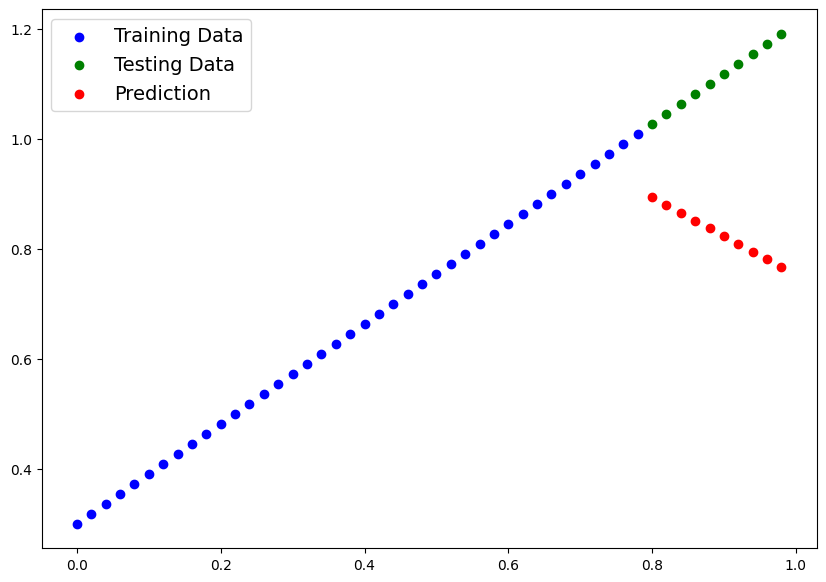

In [9]:
plotPredictions(prediction= yPreds)

# the difference in the values and graph compared to the video occurs from different random seeds